<a href="https://colab.research.google.com/github/frandak2/Data_Academy/blob/main/semana%202/linear_regression_frank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [ ]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Studen_perfor = pd.read_csv('/content/drive/MyDrive/Datacademy/studentsperformance.csv')
Studen_perfor.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print(Studen_perfor.shape)
print(Studen_perfor.columns)

(1000, 8)
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


### Creando un histograma

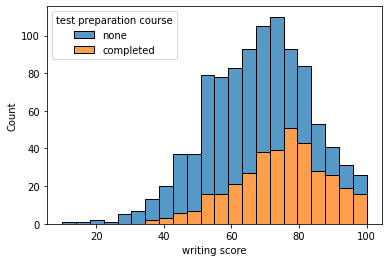

In [ ]:
sns.histplot(data=Studen_perfor, x='writing score', hue='test preparation course', multiple='stack')

### Visualizando nuestros datos

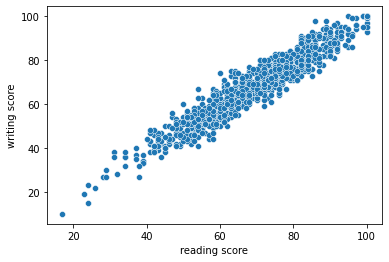

In [ ]:
sns.scatterplot(data=Studen_perfor, x= 'reading score', y = 'writing score')

### Creando una tabla de frecuencias

In [ ]:
freq = Studen_perfor['writing score'].value_counts()
freq_df = freq.to_frame().reset_index()
freq_df.columns = ['writing score', 'number of student']
freq_df

,writing score,number of student
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [ ]:
Studen_perfor.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [ ]:
Studen_perfor.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [ ]:
X = Studen_perfor['reading score'].values
Y = Studen_perfor['writing score'].values 

X = X.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)


In [ ]:
##linear regresion
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)
print("slope: ", reg.coef_)
print("bias: ", reg.intercept_)
print('R2: ', reg.score(X_train,Y_train))

slope:  [1.00199071]
bias:  -1.206315300470493
R2:  0.9104517079186357


## Visualización de nuestro modelo entrenado

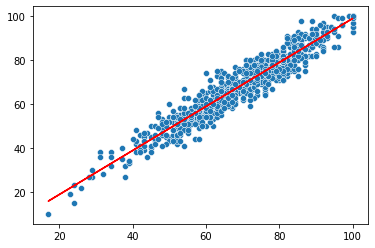

In [ ]:
x_flat = X_train.flatten()
y_hat = reg.predict(X_train)
fig, ax = plt.subplots()
sns.scatterplot(x = x_flat, y=Y_train)
plt.plot(X_train, y_hat, color = 'r')

## Evaluación de nuestro modelo

In [ ]:
from sklearn.metrics import mean_squared_error

y_predict = reg.predict(X_test)

mean_squared_error(Y_test,y_predict)



17.938570793274586

In [ ]:
values = pd.DataFrame({'actual':Y_test.flatten(), 'predict':y_predict.flatten()})
values

,actual,predict
0,99,98.992755
1,92,93.982802
2,68,68.933034
3,73,68.933034
4,81,89.974839
...,...,...
195,72,70.937016
196,79,75.946969
197,79,80.956923
198,47,56.909146
